In [ ]:
##### Eugenio Perez Molphe Montoya #####
##### 21.10.2024 #####
##### Take the lists of E. coli genomes with iroN, the df with promoters, and the lists with the immunity genes #####
##### and create a df with the promoters and the immunity genes, and a Venn diagram of immunity genes vs argR #####

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from scipy.stats import chi2_contingency

In [2]:
# Files
df = pd.read_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df.csv", sep='\t') # Promoters
df.rename(columns={'Unnamed: 0': 'Genome'}, inplace=True)
df['ArgR'] = ((df['argR'] == 1) | (df['argR2'] == 1)).astype(int)
df = df.drop(['argR', 'argR2'], axis=1)
df['Genome'] = df['Genome'].apply(lambda x: x + '.1' if not x.endswith('.1') else x)

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Escherichia_w_iroN.txt") as f:
    iroN = f.readlines() # iroN

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/mchB_list.txt") as f:
    mchB = f.readlines() # Immunity genes: mchB

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/mchI_list.txt") as f:
    mchI = f.readlines() # Immunity genes: mchI

with open("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Immunity_genes/microcin_list.txt") as f:
    microcin = f.readlines() # Immunity genes: microcin

In [3]:
### Functions :D
def get_promoters(df, genomesList, geneName):
    '''Get the promoters of the genomes in the list and append them the df as a new column'''
    # Strip any whitespace from the genomes list
    genomesList = [genome.strip() for genome in genomesList]
    # Add a new presence/absence column to the df
    df[geneName] = df['Genome'].apply(lambda x: 1 if x in genomesList else 0)

    return df

def chi_test(promoter, df, out):
    ''' Perform a chi-squared test of independence between the presence of the immunity genes and the presence of a promoter'''
    # Create a contingency table
    obs = pd.crosstab(df[promoter], [df['mchB'], df['mchB']])

    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(obs)
    print(f"{promoter}: {chi2}, p-value: {p}, dof: {dof}")

    # Write the results to a file
    with open(out, 'a') as f:
        f.write(f"{promoter}: {chi2}, p-value: {p}, dof: {dof}\n")


In [4]:
# So names in the DF are not the accession numbers, so I'll change that

# Read the two columns CSV file with the accesion codes for the contig names as a dictionary
accession_dict = pd.read_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Escherichia_contig-NCBI_codes.csv", header=None, index_col=0).to_dict()

# Replace the names in the dataframe with the accession numbers
df['Genome'] = df['Genome'].apply(lambda x: accession_dict[1][x] if x in accession_dict[1] else x)

print(df)

              Genome  arcA  crp  deoR  fnr  gcvA  hns  ihf  ilvY  lexA  lrp  \
0    GCA_013039965.1     1    0     0    0     0    0    2     0     0    0   
1    GCA_003794675.1     1    0     0    1     0    0    2     1     0    0   
2    GCA_017753105.1     0    0     0    0     0    0    0     0     2    0   
3    GCA_012609475.1     0    0     0    0     0    0    0     0     1    0   
4    GCA_012375295.1     1    0     0    1     0    0    2     1     0    0   
..               ...   ...  ...   ...  ...   ...  ...  ...   ...   ...  ...   
156  GCA_003686805.1     0    0     0    0     0    0    2     0     0    0   
157  GCA_014747345.1     1    0     0    1     0    0    2     1     0    0   
158  GCA_002846135.1     0    2     0    0     0    0    0     0     0    0   
159  GCA_015094695.1     0    0     2    0     1    0    0     0     0    0   
160  GCA_016946115.1     0    0     0    0     0    0    0     0     0    0   

     ompR  phoB  purR  rpoD16  rpoD18  rpoD19  rpoH

In [5]:
# Add a column for each immunity gene
df = get_promoters(df, mchB, 'mchB')
df = get_promoters(df, mchI, 'mchI')
df = get_promoters(df, microcin, 'microcin')

# Save the df
df.to_csv("/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df_with_immunity_genes.csv", sep='\t', index=False)

print(df)

              Genome  arcA  crp  deoR  fnr  gcvA  hns  ihf  ilvY  lexA  ...  \
0    GCA_013039965.1     1    0     0    0     0    0    2     0     0  ...   
1    GCA_003794675.1     1    0     0    1     0    0    2     1     0  ...   
2    GCA_017753105.1     0    0     0    0     0    0    0     0     2  ...   
3    GCA_012609475.1     0    0     0    0     0    0    0     0     1  ...   
4    GCA_012375295.1     1    0     0    1     0    0    2     1     0  ...   
..               ...   ...  ...   ...  ...   ...  ...  ...   ...   ...  ...   
156  GCA_003686805.1     0    0     0    0     0    0    2     0     0  ...   
157  GCA_014747345.1     1    0     0    1     0    0    2     1     0  ...   
158  GCA_002846135.1     0    2     0    0     0    0    0     0     0  ...   
159  GCA_015094695.1     0    0     2    0     1    0    0     0     0  ...   
160  GCA_016946115.1     0    0     0    0     0    0    0     0     0  ...   

     purR  rpoD16  rpoD18  rpoD19  rpoH2  tyrR  Arg

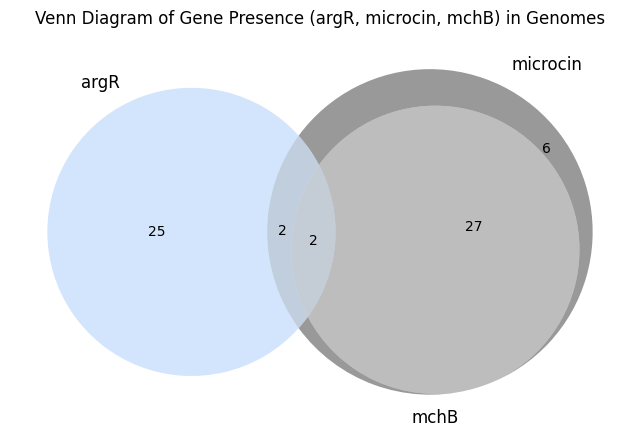

In [10]:
# Time to do the Venn diagram

# Select the genes that I want to see the Venn diagram of
geneA = 'ArgR'
geneB = 'microcin'
geneC = 'mchI'

# Convert columns to sets (index of genomes that have the gene)
setA = set(df[df[geneA] >= 1].index)
setB = set(df[df[geneB] >= 1].index)
setC = set(df[df[geneC] >= 1].index)

# Plot a Venn diagram
plt.figure(figsize=(8, 8))

# For three genes:
venn3([setA, setB, setC], set_labels=('argR', 'microcin', 'mchB'), set_colors=('#90bFF9', 'black', 'grey'))

plt.title("Venn Diagram of Gene Presence (argR, microcin, mchB) in Genomes")
plt.show()

In [11]:
# Chi-squared test for microcin
# The path of the output file
out = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Chit_sqr.txt'

# Chi-squared test for ArgR
obs = pd.crosstab(df['microcin'], df['ArgR'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"microcin vs ArgR: {chi2}, p-value: {p}, dof: {dof}\n")

# Chi-squared test for mchI
obs = pd.crosstab(df['microcin'], df['mchB'])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"microcin vs mchB: {chi2}, p-value: {p}, dof: {dof}\n")

ArgR: 1.1133612519006004, p-value: 0.2913524524009886, dof: 1
ArgR: 9.64683564227367, p-value: 0.0018967805222174997, dof: 1


In [20]:
# Chi-squared test

# The path of the output file
out = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Results/Chit_sqr.txt'



### mchB vs mchI
# Create a contingency table
obs = pd.crosstab(df[geneB], df[geneC])
chi2, p, dof, expected = chi2_contingency(obs)
print(f"ArgR: {chi2}, p-value: {p}, dof: {dof}")
with open(out, 'a') as f:
    f.write(f"mchB vs mchI: {chi2}, p-value: {p}, dof: {dof}\n")

### Time to do the chi-squared test for the immunity genes vs promoters
# ArgR
chi_test('ArgR', df, out)
# arcA
chi_test('arcA', df, out)
# crp
chi_test('crp', df, out)
# deoR
chi_test('deoR', df, out)
# fnr
chi_test('fnr', df, out)
# gcvA
chi_test('gcvA', df, out)
# hns
chi_test('hns', df, out)
# ihf
chi_test('ihf', df, out)
# ilvY
chi_test('ilvY', df, out)
# lexA
chi_test('lexA', df, out)
# lrp
chi_test('lrp', df, out)
# ompR
chi_test('ompR', df, out)
# phoB
chi_test('phoB', df, out)
# purR
chi_test('purR', df, out)
# rpoD16
chi_test('rpoD16', df, out)
# rpoD18
chi_test('rpoD18', df, out)
# rpoD19
chi_test('rpoD19', df, out)
# rpoH2
chi_test('rpoH2', df, out)
# tyrR
chi_test('tyrR', df, out)

ArgR: 13.41159352558087, p-value: 0.0002500738823328089, dof: 1
ArgR: 0.0844016640709755, p-value: 0.7714187240837298, dof: 1
arcA: 0.30713951762100977, p-value: 0.5794408191349135, dof: 1
crp: 0.15878364495582498, p-value: 0.9236779357544848, dof: 2
deoR: 0.0, p-value: 1.0, dof: 1
fnr: 1.542598943872829, p-value: 0.462411786581743, dof: 2
gcvA: 0.0, p-value: 1.0, dof: 1
hns: 0.0, p-value: 1.0, dof: 1
ihf: 2.849748575259806, p-value: 0.24053869999780988, dof: 2
ilvY: 1.3112665761720792, p-value: 0.519113210257546, dof: 2
lexA: 1.9017950202663578, p-value: 0.38639407518511815, dof: 2
lrp: 17.201561536881034, p-value: 0.0001839621057749525, dof: 2
ompR: 0.0, p-value: 1.0, dof: 1
phoB: 0.0, p-value: 1.0, dof: 1
purR: 17.91167728237792, p-value: 0.00012898187837432135, dof: 2
rpoD16: 0.0, p-value: 1.0, dof: 1
rpoD18: 9.106242038216562, p-value: 0.010534275349851184, dof: 2
rpoD19: 0.0, p-value: 1.0, dof: 1
rpoH2: 1.0175282674171728, p-value: 0.6012381698333511, dof: 2
tyrR: 0.0, p-value: 1